# Cifar10 neural network

## 1) GPU의 정보를 확인합니다

In [1]:
!nvidia-smi

Tue Jan 21 10:02:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 2) 필요한 모듈을 import 합니다

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

## 3) 재현성을 위해 seed를 고정시킵니다

In [3]:
random.seed(1)
torch.manual_seed(1)

## 4) hyper parameter를 설정합니다

In [4]:
batch_size = 100
epochs = 15
learning_rate = 1e-5
drop_prop = 0.3

## 5) train, test set을 불러옵니다

In [6]:
cifar10_train = dsets.CIFAR10(root='cifar10',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)
cifar10_test = dsets.CIFAR10(root='cifar10',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True)

100.0%

Extracting cifar10\cifar-10-python.tar.gz to cifar10
Files already downloaded and verified


## 6) batch size에 맞춰서 train set을 data loader에 넣어줍니다

In [0]:
data_loader = torch.utils.data.DataLoader(dataset=cifar10_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

## 7) 학습 모델의 architecture를 구성합니다

In [0]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(3*32*32, 512, bias=True),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=drop_prop))
        
        self.layer2 = nn.Sequential(
            nn.Linear(512, 512, bias=True),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=drop_prop))
        
        self.layer3 = nn.Sequential(
            nn.Linear(512, 512, bias=True),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=drop_prop))
        
        self.layer4 = nn.Sequential(
            nn.Linear(512, 512, bias=True),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=drop_prop))
        
        self.layer5 = nn.Sequential(
            nn.Linear(512, 10, bias=True))
        
        nn.init.xavier_uniform_(self.layer1[0].weight)
        nn.init.xavier_uniform_(self.layer2[0].weight)
        nn.init.xavier_uniform_(self.layer3[0].weight)
        nn.init.xavier_uniform_(self.layer4[0].weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        
        return out

## 8) 모델 정보를 출력해봅니다

In [136]:
model = LinearModel()
print(model)

LinearModel(
  (layer1): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
  )
  (layer5): Sequential(
    (0): Linear(in_fea

## 9) 임의의 텐서를 모델에 넣고 테스트를 수행합니다

In [137]:
value = torch.FloatTensor(10, 3072)
model(value).shape

torch.Size([10, 10])

## 10) training에 앞서 loss function과 optimizer를 생성합니다

In [0]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 11) 본격적으로 epoch를 돌며 training을 시작합니다

In [139]:
model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)

    for x_train, y_train in data_loader:
        x_train = x_train.view(-1, 3*32*32).float()

        prediction = model(x_train)
        
        loss = loss_function(prediction, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch
    
    print('[epoch: {:3d}/{}] loss: {:.6f}'.format(epoch, epochs, avg_loss))
print('Learning finished')

[epoch:   1/15] loss: 2.248082
[epoch:   2/15] loss: 2.059156
[epoch:   3/15] loss: 1.953586
[epoch:   4/15] loss: 1.880855
[epoch:   5/15] loss: 1.832420
[epoch:   6/15] loss: 1.791114
[epoch:   7/15] loss: 1.755064
[epoch:   8/15] loss: 1.723019
[epoch:   9/15] loss: 1.698962
[epoch:  10/15] loss: 1.673894
[epoch:  11/15] loss: 1.652895
[epoch:  12/15] loss: 1.636065
[epoch:  13/15] loss: 1.618863
[epoch:  14/15] loss: 1.600850
[epoch:  15/15] loss: 1.588838
Learning finished


## 12) 학습된 모델을 test 합니다

accuracy:  0.10000000149011612
Label: 9, truck
Prediction: 2, bird


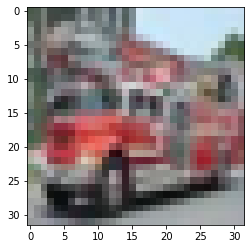

In [159]:
with torch.no_grad():
    model.eval()
    x_test = torch.FloatTensor(cifar10_test.data).view(len(cifar10_test), 3*32*32)
    y_test = torch.LongTensor(cifar10_test.targets)

    prediction = model(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    accuracy = correct.float().mean()
    print('accuracy: ', accuracy.item())

    r = random.randint(0, len(cifar10_test)-1)
    x_test_r = torch.FloatTensor(cifar10_test.data[r]).view(1, 3*32*32)
    y_test_r = torch.LongTensor(y_test)[r]
    prediction_r = model(x_test_r)
    predic_num = torch.argmax(prediction_r, 1).item()
    labels = cifar10_test.classes

    print('Label: {}, {}'.format(y_test_r.item(), labels[y_test_r.item()]))
    print('Prediction: {}, {}'.format(predic_num, labels[predic_num]))

    plt.imshow(cifar10_test.data[r])
    plt.show()

# Full code

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as tranforms
import random
import matplotlib.pyplot as plt

random.seed(1)
torch.manual_seed(1)

batch_size = 100
epochs = 15
learning_rate = 1e-4

cifar10_train = dsets.CIFAR10(root='cifar10',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=False)
cifar10_test = dsets.CIFAR10(root='cifar10',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=False)

data_loader = torch.utils.data.DataLoader(dataset=cifar10_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(3*32*32, 32*32),
            nn.ReLU())
        
        self.layer2 = nn.Sequential(
            nn.Linear(32*32, 32*32),
            nn.ReLU())
        
        self.layer3 = nn.Sequential(
            nn.Linear(32*32, 10))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        return out

model = LinearModel()
# value = torch.Tensor(10, 3*32*32)
# model(value).shape

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)

    for x_train, y_train in data_loader:
        x_train = x_train.view(batch_size, 3*32*32).float()

        prediction = model(x_train)

        loss = loss_function(prediction, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch

    print('[epoch: {:2d}/{}] loss: {:.6f}'.format(epoch, epochs, avg_loss))

print('learning_finished')

[epoch:  1/15] loss: 1.876675
[epoch:  2/15] loss: 1.666924
[epoch:  3/15] loss: 1.583653
[epoch:  4/15] loss: 1.523298
[epoch:  5/15] loss: 1.474545
[epoch:  6/15] loss: 1.438906
[epoch:  7/15] loss: 1.398982
[epoch:  8/15] loss: 1.365866
[epoch:  9/15] loss: 1.333320
[epoch: 10/15] loss: 1.300592
[epoch: 11/15] loss: 1.274408
[epoch: 12/15] loss: 1.249824
[epoch: 13/15] loss: 1.229460
[epoch: 14/15] loss: 1.203299
[epoch: 15/15] loss: 1.185990
learning_finished


accuracy:  0.10350000113248825
Label: 5, dog
Prediction: 0, airplane


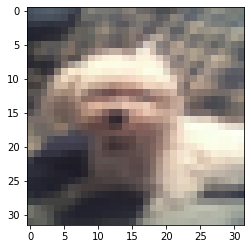

In [190]:
model.eval()
with torch.no_grad():
    x_test = torch.FloatTensor(cifar10_test.data).view(len(cifar10_test), 3*32*32)
    y_test = torch.LongTensor(cifar10_test.targets)

    prediction = model(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    accuracy = correct.float().mean()
    print('accuracy: ', accuracy.item())

    r = random.randint(0, len(cifar10_test)-1)
    x_test_r = torch.FloatTensor(cifar10_test.data[r]).view(3*32*32)
    y_test_r = y_test[r]
    prediction_r = model(x_test_r)

    classes = cifar10_test.classes

    print('Label: {}, {}'.format(y_test_r.item(), classes[y_test_r.item()]))
    print('Prediction: {}, {}'.format(torch.argmax(prediction_r).item(), classes[torch.argmax(prediction_r).item()]))

    plt.imshow(cifar10_test.data[r])
    plt.show()